In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the data and do some basic cleaning
df = pd.read_csv('EMS_Incident_Dispatch_Data(2018-2020,Manhattan).csv')
df_copy = df.copy()
def limit_dates(df, start_date, end_date):
    ''' 
    Set INCIDENT_DATETIME to a datetime format and slice to include only relevant dates.
    Creates a new 'INCIDENT_DATE' column to allow for grouping
    '''
    
    # Format to DT
    df['INCIDENT_CLOSE_DATETIME'] = pd.to_datetime(df['INCIDENT_CLOSE_DATETIME'], format='%m/%d/%Y %I:%M:%S %p')
    
    # Create and apply mask
    mask = (df['INCIDENT_CLOSE_DATETIME'] > start_date) & (df['INCIDENT_CLOSE_DATETIME'] <= end_date)
    df = df.loc[mask]
    
    # New column for date only
    df['INCIDENT_DATE'] = df['INCIDENT_CLOSE_DATETIME'].dt.date
    
    return df

df = limit_dates(df, '03/01/2020', '04/30/2020')
df_copy=limit_dates(df_copy, '1/1/2020', '4/30/2020')
precovid=limit_dates(df_copy, '1/1/2019', '2/28/2020')
covid=limit_dates(df_copy, '3/1/2020', '4/30/2020')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (7,11,17,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-3-854e7708d829>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INCIDENT_DATE'] = df['INCIDENT_CLOSE_DATETIME'].dt.date


(array([737485., 737492., 737499., 737506., 737516., 737523., 737530.,
        737537., 737546.]),
 <a list of 9 Text major ticklabel objects>)

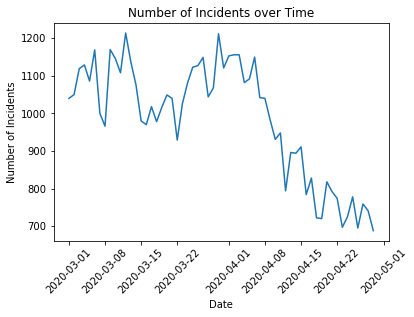

In [23]:
df_slice = df[['INCIDENT_DATETIME', 'INCIDENT_DATE']].groupby('INCIDENT_DATE').count()
df_slice.plot(legend=None)
plt.ylabel('Number of Incidents')
plt.xlabel('Date')
plt.title('Number of Incidents over Time')
plt.xticks(rotation = 45)


,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,...,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR,INCIDENT_DATE
160741,201042884,04/13/2020 02:30:07 PM,ABDPFC,5,ABDPFC,5,04/13/2020 02:30:18 PM,Y,11,04/13/2020 02:30:32 PM,...,NaN,NaN,NaN,NaN,NaN,N,N,N,N,2020-04-13
363535,200623218,03/02/2020 05:09:50 PM,EDP,7,EDP,7,NaN,N,0,NaN,...,28.0,9.0,110.0,5.0,13.0,N,N,N,N,2020-03-02
363730,200633403,03/03/2020 05:58:33 PM,INJURY,5,INJURY,5,03/03/2020 06:01:57 PM,Y,204,03/03/2020 06:02:12 PM,...,7.0,1.0,103.0,1.0,12.0,N,N,N,N,2020-03-03
377906,200603498,02/29/2020 08:09:25 PM,ALTMEN,3,ALTMEN,3,02/29/2020 08:09:33 PM,Y,8,02/29/2020 08:09:46 PM,...,5.0,1.0,101.0,2.0,7.0,N,N,N,N,2020-03-01
377996,200603854,02/29/2020 09:43:08 PM,INJURY,5,INJURY,5,02/29/2020 09:43:26 PM,Y,18,02/29/2020 09:44:35 PM,...,6.0,3.0,102.0,2.0,10.0,N,N,N,N,2020-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437160,201203350,04/29/2020 11:10:27 PM,DRUG,4,DRUG,4,04/29/2020 11:10:41 PM,Y,14,04/29/2020 11:11:34 PM,...,30.0,7.0,109.0,6.0,13.0,N,N,N,N,2020-04-29
437161,201203354,04/29/2020 11:12:16 PM,HYPTN,7,HYPTN,7,04/29/2020 11:12:25 PM,Y,9,04/29/2020 11:12:45 PM,...,34.0,10.0,112.0,6.0,13.0,N,N,N,N,2020-04-29
437164,201203360,04/29/2020 11:16:07 PM,CARDBR,2,CARDBR,2,04/29/2020 11:16:24 PM,Y,17,04/29/2020 11:16:44 PM,...,6.0,1.0,102.0,2.0,10.0,N,N,N,N,2020-04-29
437165,201203367,04/29/2020 11:19:50 PM,EDP,7,SICK,6,04/29/2020 11:19:59 PM,Y,9,04/29/2020 11:20:18 PM,...,28.0,9.0,110.0,3.0,13.0,N,N,N,N,2020-04-29


Text(0.5, 0, 'Dispatch Area')

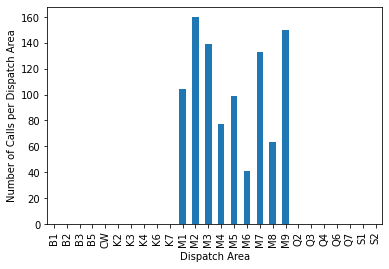

In [28]:

y = df[['INCIDENT_DATETIME', 'INCIDENT_DISPATCH_AREA']].groupby('INCIDENT_DISPATCH_AREA').count()/61
y.plot(kind='bar', legend=None)
plt.ylabel('Number of Calls per Dispatch Area')
plt.xlabel('Dispatch Area')
#plt.yscale('log')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

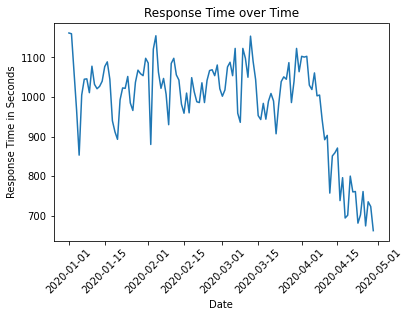

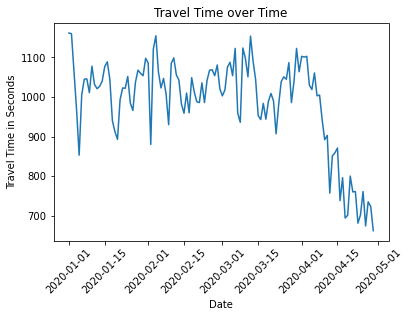

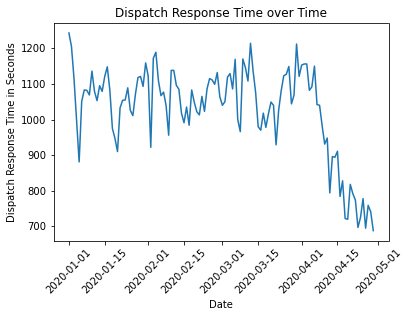

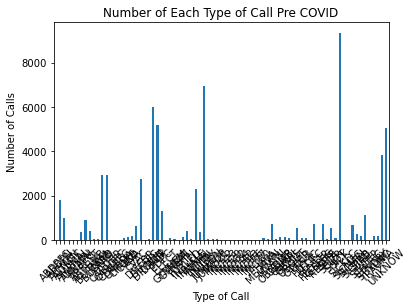

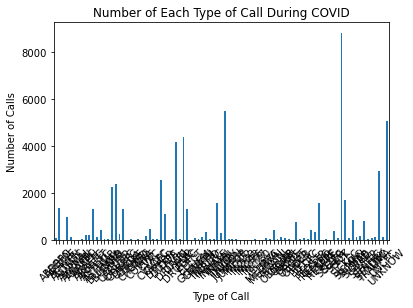

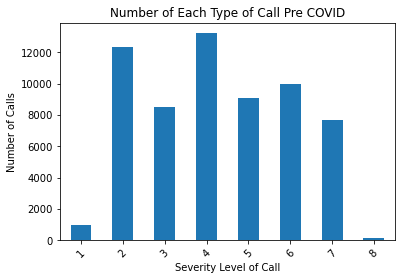

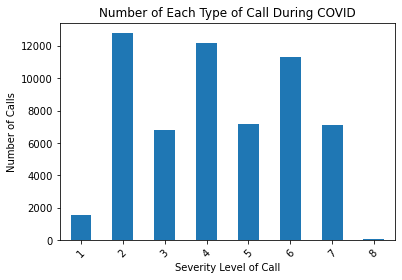

In [25]:
responsetime = df_copy[['INCIDENT_DATE', 'INCIDENT_RESPONSE_SECONDS_QY']].groupby('INCIDENT_DATE').count()
responsetime.plot(legend=None)
plt.ylabel('Response Time in Seconds')
plt.xlabel('Date')
plt.title('Response Time over Time')
plt.xticks(rotation = 45)
traveltime=df_copy[['INCIDENT_DATE', 'INCIDENT_TRAVEL_TM_SECONDS_QY']].groupby('INCIDENT_DATE').count()
traveltime.plot(legend=None)
plt.ylabel('Travel Time in Seconds')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.title('Travel Time over Time')
dispatch=df_copy[['INCIDENT_DATE', 'DISPATCH_RESPONSE_SECONDS_QY']].groupby('INCIDENT_DATE').count()
dispatch.plot(legend=None)
plt.ylabel('Dispatch Response Time in Seconds')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.title('Dispatch Response Time over Time')
calltypeprecovid=precovid[['INCIDENT_DATE', 'FINAL_CALL_TYPE']].groupby('FINAL_CALL_TYPE').count()
calltypeprecovid.plot(kind='bar', legend=None)
plt.ylabel('Number of Calls')
plt.xlabel('Type of Call')
plt.title('Number of Each Type of Call Pre COVID')
plt.xticks(rotation = 45)
calltypecovid=covid[['INCIDENT_DATE', 'FINAL_CALL_TYPE']].groupby('FINAL_CALL_TYPE').count()
calltypecovid.plot(kind='bar', legend=None)
plt.ylabel('Number of Calls')
plt.xlabel('Type of Call')
plt.title('Number of Each Type of Call During COVID')
plt.xticks(rotation = 45)
severityprecovid=precovid[['INCIDENT_DATE', 'FINAL_SEVERITY_LEVEL_CODE']].groupby('FINAL_SEVERITY_LEVEL_CODE').count()
severityprecovid.plot(kind='bar', legend=None)
plt.ylabel('Number of Calls')
plt.xlabel('Severity Level of Call')
plt.title('Number of Each Type of Call Pre COVID')
plt.xticks(rotation = 45)
severitycovid=covid[['INCIDENT_DATE', 'FINAL_SEVERITY_LEVEL_CODE']].groupby('FINAL_SEVERITY_LEVEL_CODE').count()
severitycovid.plot(kind='bar', legend=None)
plt.ylabel('Number of Calls')
plt.xlabel('Severity Level of Call')
plt.title('Number of Each Type of Call During COVID')
plt.xticks(rotation = 45)

In [ ]:
sns.pairplot(df_copy)